In [256]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline
sns.set()
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [257]:
# loading training and testing sets
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

EDA

In [258]:
print("df_train.shape : " , df_train.shape)
print("*"*50)
print("df_test.shape  : " , df_test.shape)

df_train.shape :  (1460, 81)
**************************************************
df_test.shape  :  (1459, 80)


Skewness: 1.882876
Kurtosis: 6.536282


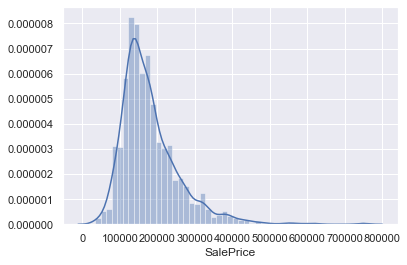

In [259]:
sns.distplot(df_train['SalePrice']);
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [260]:
# dropping the column "Id" since it is not useful for predicting SalePrice
df_train.drop('Id',axis=1,inplace=True )
id_test = df_test['Id']                      # for submissions
df_test.drop('Id',axis=1,inplace=True )
df_train.describe().transpose()
# For the numerical columns, only three have missing values: LotFrontage, MasVnrArea and GarageYrBlt.

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [261]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

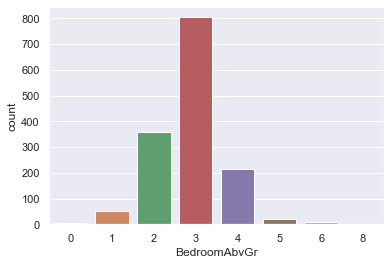

In [262]:
# An assumption that the number of bedrooms in a house could have an impact in the sales price. 
# So the distribution the number of rooms availables per each house.
sns.countplot(df_train.BedroomAbvGr)

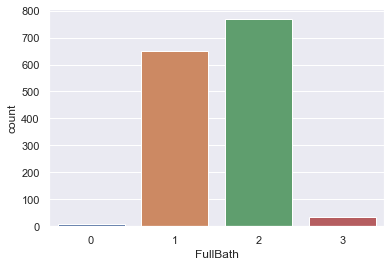

In [263]:
sns.countplot(df_train.FullBath )

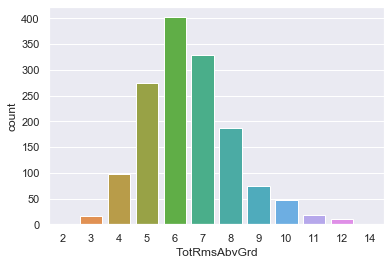

In [264]:
# Here because most houses have 3 bedrooms we expect each house to have 6 total rooms (3 bedrooms + a kitchen + living room
# + dining room)
sns.countplot(df_train.TotRmsAbvGrd)

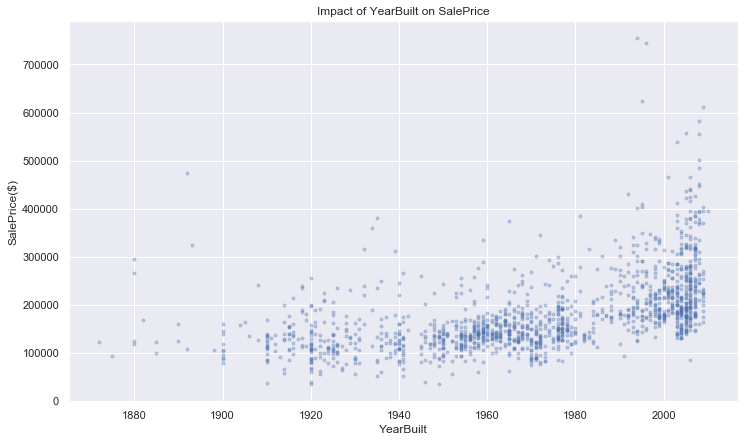

In [265]:
# Next I wanted to explore if there was an impact on sales prices by year
plt.figure(figsize=(12,7))
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice($)")
plt.title("Impact of YearBuilt on SalePrice")
plt.plot(df_train.YearBuilt, df_train.SalePrice ,'.', alpha = 0.3)

In [266]:
TotRmsAbvGrd = df_train.pivot_table(index='TotRmsAbvGrd', values='SalePrice', aggfunc=np.median)
TotRmsAbvGrd

,SalePrice
TotRmsAbvGrd,
2,39300.0
3,100000.0
4,120500.0
5,130250.0
6,155000.0
7,184100.0
8,200000.0
9,252000.0
10,285000.0


In [267]:
Bedrooms_pivot = df_train.pivot_table(index='BedroomAbvGr', values='SalePrice', aggfunc=np.median)
Bedrooms_pivot

,SalePrice
BedroomAbvGr,
0,202500
1,145250
2,137250
3,169945
4,193500
5,161500
6,141000
8,200000


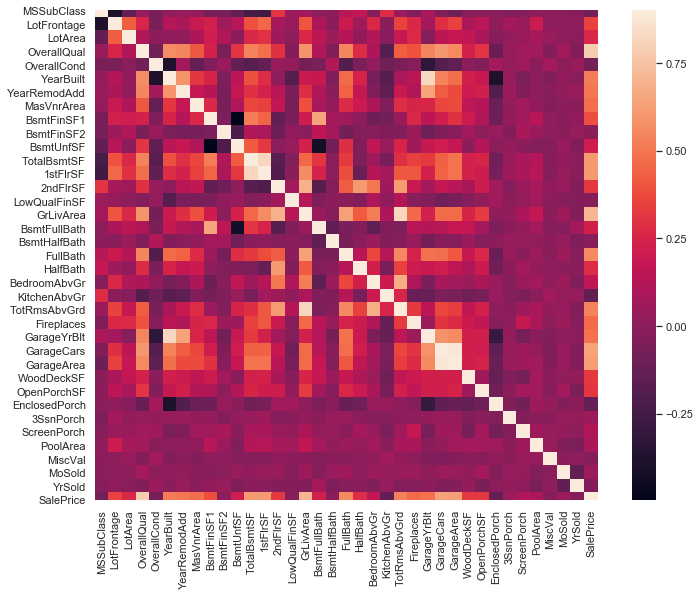

In [268]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [269]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
1,20,RL,70.0,7945,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,141000
2,20,RL,NaN,8475,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,135750
3,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
4,20,RL,69.0,8973,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnWw,NaN,0,7,2006,WD,Abnorml,150000


In [270]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print("*"*100)
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))
print("*"*100)
print(df_train[numerical_feats].columns)
numerical_columns = df_train.select_dtypes(exclude=['object']).columns.tolist()
print("*"*100)
print(df_train[categorical_feats].columns)

Number of Numerical features:  37
****************************************************************************************************
Number of Categorical features:  43
****************************************************************************************************
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley

Data Cleaning 

In [271]:
# start dealing with missing values where it makes sense 
# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

# Alley : data description says NA means "no alley access"
df_train["Alley"] = df_train["Alley"].fillna("None")

# Fence : data description says NA means "no fence"
df_train["Fence"] = df_train["Fence"].fillna("None")

# FireplaceQu : data description says NA means "no fireplace"
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')
    
# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_train = df_train.drop(['Utilities'], axis=1)

# Functional : data description says NA means typical
df_train["Functional"] = df_train["Functional"].fillna("Typ")

# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD"
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class. We can replace missing values with None
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")




In [272]:
# start dealing with missing values where it makes sense 
# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

df_test["PoolQC"] = df_test["PoolQC"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("None")

# Alley : data description says NA means "no alley access"
df_test["Alley"] = df_test["Alley"].fillna("None")

# Fence : data description says NA means "no fence"
df_test["Fence"] = df_test["Fence"].fillna("None")

# FireplaceQu : data description says NA means "no fireplace"
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_test[col] = df_test[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_test[col] = df_test[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_test[col] = df_test[col].fillna(0)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_test[col] = df_test[col].fillna('None')
    
# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0)

# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_test = df_test.drop(['Utilities'], axis=1)

# Functional : data description says NA means typical
df_test["Functional"] = df_test["Functional"].fillna("Typ")

# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD"
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class. We can replace missing values with None
df_test['MSSubClass'] = df_test['MSSubClass'].fillna("None")


In [273]:
## Dropping Colummns with Null Values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtCond,0,0.0


In [274]:
#not dealing with missing values 
x = list(missing_data[missing_data['Total'] > 0].index)
df_train.drop(x,axis=1,inplace=True )
df_test.drop(x,axis=1,inplace=True )

In [275]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
df_test['OverallCond'] = df_test['OverallCond'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

# Adding total quare footage feature 
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

Top Largest Correlations :
SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.349876
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
GarageYrBlt     0.261366
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Name: SalePrice, dtype: float64
____________________________
Top Smallest Correlations :
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtH

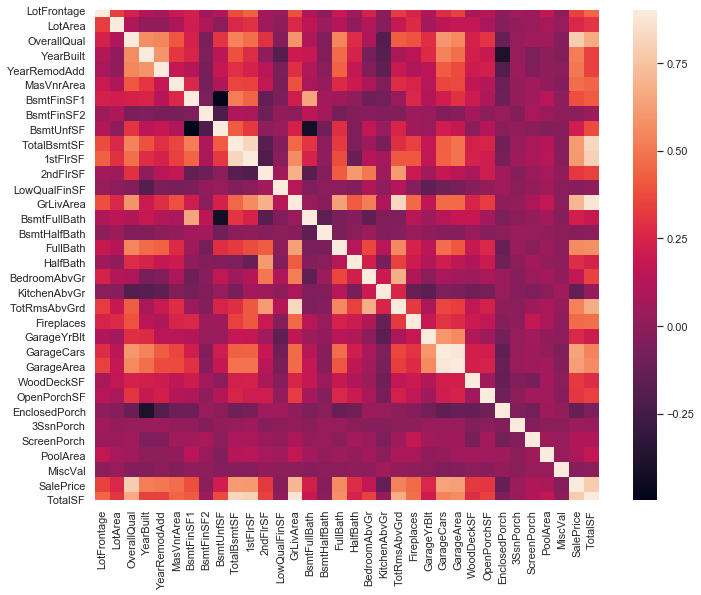

In [276]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
n_largest_top = 31
n_smallest_top = 15
top_large_corr = corrmat.nlargest(n_largest_top, 'SalePrice')['SalePrice']
top_small_corr = corrmat.nsmallest(n_smallest_top, 'SalePrice')['SalePrice']
print("Top Largest Correlations :") 
print(top_large_corr)
print("____________________________")
print("Top Smallest Correlations :") 
print(top_small_corr)
num_attrs = np.append(top_large_corr.index.values, top_small_corr.index.values, axis=0)

In [277]:
for attr in df_train.select_dtypes(include='object'):
    print(df_train[[attr, "SalePrice"]].groupby([attr], as_index=False).mean().sort_values(by='SalePrice', ascending=False))
    print("\n ________________________ \n")

   MSSubClass      SalePrice
9          60  239948.501672
0         120  200779.080460
11         75  192437.500000
4          20  185224.811567
12         80  169736.551724
10         70  166772.416667
6          40  156125.000000
13         85  147810.000000
8          50  143302.972222
1         160  138647.380952
14         90  133541.076923
3         190  129613.333333
7          45  108591.666667
2         180  102300.000000
5          30   95829.724638

 ________________________ 

  MSZoning      SalePrice
1       FV  214014.061538
3       RL  191004.994787
2       RH  131558.375000
4       RM  126316.830275
0  C (all)   74528.000000

 ________________________ 

  Street      SalePrice
1   Pave  181130.538514
0   Grvl  130190.500000

 ________________________ 

  Alley      SalePrice
1  None  183452.131483
2  Pave  168000.585366
0  Grvl  122219.080000

 ________________________ 

  LotShape      SalePrice
1      IR2  239833.365854
2      IR3  216036.500000
0      IR1  206101.665

In [278]:
categorical_var =["MSZoning","LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", "HouseStyle", "RoofStyle", 
            "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "Functional", 
            "GarageType", "GarageFinish", "SaleType", "SaleCondition"]
X = df_train[['TotalSF', "GrLivArea", 'GarageCars', 'GarageArea', 'OverallQual', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd','YearBuilt']]

In [279]:
# Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of 
# the predicted value and the logarithm of the observed sales price. 
# (Taking logs means that errors in predicting expensive houses and cheap houses will 
# affect the result equally.)

In [280]:
X.head()

,TotalSF,GrLivArea,GarageCars,GarageArea,OverallQual,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,1686,854,2,576,7,854,1,5,1929
1,2300,1150,1,300,5,1150,1,6,1959
2,1904,952,1,283,4,952,1,4,1956
3,1040,1040,2,420,4,1040,1,4,1950
4,2061,1053,2,750,5,1053,1,6,1958


In [281]:
for each in categorical_var:
    X = pd.concat([X, pd.get_dummies(df_train[each])], sort = False, axis = 1)

In [282]:
print(len(list(X.columns)))
print(len(np.unique(list(X.columns))))

172
146


In [291]:
y = df_train[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [292]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import xgboost
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import ElasticNet


In [293]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)
np.sqrt(mean_squared_log_error( y_test, y_pred_linear_reg ))

0.1808712959685125

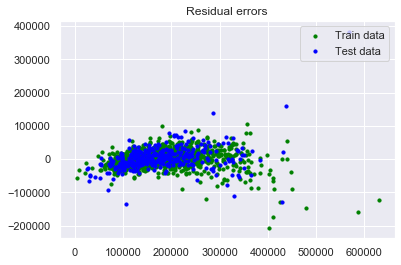

In [286]:
plt.scatter(linear_reg.predict(X_train), linear_reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(linear_reg.predict(X_test), linear_reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show()

In [294]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
np.sqrt(mean_squared_log_error( y_test, y_pred_lasso))

C:\Users\miapr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321958130181.75653, tolerance: 716763906.6697376
  positive)


0.17966857424568625

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

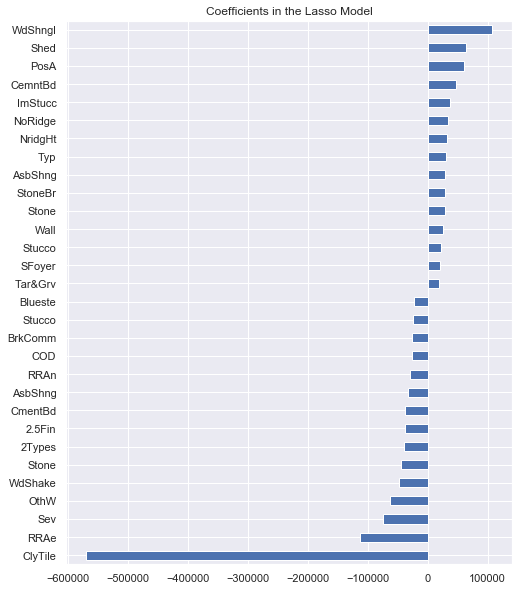

In [288]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(15),
                     coef.sort_values().tail(15)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [295]:
eNet = ElasticNet(random_state=0)
eNet.fit(X_train, y_train)
y_pred_enet = eNet.predict(X_test)
np.sqrt(mean_squared_log_error( y_test, y_pred_enet))

0.1839555721636514